# Logistic Regression on Titanic dataset

In [1]:
### loading the required libraries.....
import numpy  as np
import pandas as pd
import seaborn as sns

In [2]:
### Getting a list of datasets present in seaborn....
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
### Loading the "Titanic" dataset....
tn = sns.load_dataset('titanic')

In [4]:
### Getting a look of first five rows of the dataset...
tn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
### Getting the dimensions of the dataset (no of rows n columns)
tn.shape

(891, 15)

In [6]:
### Dropping duplicate columns....
tn.drop(['alive', 'embark_town','who','class','alone','adult_male'],axis = 1,inplace = True)
tn.shape

(891, 9)

In [7]:
### Getting sum of duplicate values ....
tn.duplicated().sum()

107

In [8]:
### Dropping duplicate values...
tn.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [9]:
#### 5 point summary :
### Parametric tests : where we need normal distribution of the variables .
## Normal distribution is where the emperical rule is sstisfied : 68 % : 95 % : 99.75. within 1 sd , 2 sd , 3sd of the mean . 
#   mean = mode = median 

tn.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\imtiyaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

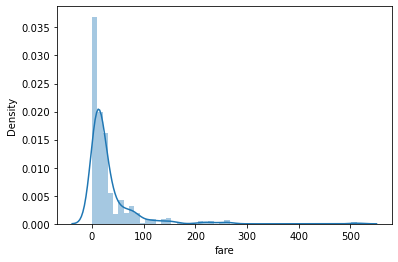

In [10]:
## Distribution plot: 
sns.distplot(tn.fare)

C:\Users\imtiyaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

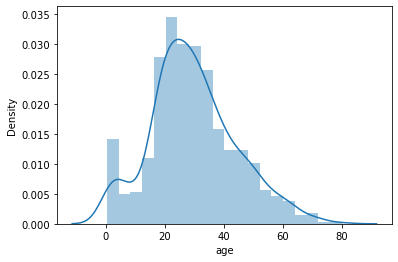

In [11]:
sns.distplot(tn.age)

In [12]:
### Getting more info of the variables (columns)....
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


In [13]:
### Converting the sex column to binary (0,1)
tn.sex.value_counts()
tn.sex=np.where(tn.sex=='male',1,0 )
tn.sex.unique()

array([1, 0])

In [14]:
### Converting Categorical variables to "Category" dtype...

tn.sex = pd.Categorical(tn.sex)
tn.pclass = pd.Categorical(tn.pclass)
tn.sibsp = pd.Categorical(tn.sibsp)
tn.survived = pd.Categorical(tn.survived)
tn.parch = pd.Categorical(tn.parch)

In [15]:
tn.dtypes

survived    category
pclass      category
sex         category
age          float64
sibsp       category
parch       category
fare         float64
embarked      object
deck        category
dtype: object

In [16]:
### Checking for null values:
Null = tn.isnull().sum()
print(Null[Null>0])

age         177
embarked      2
deck        688
dtype: int64


In [17]:
### dropping the deck column since it has way too many nulls to handle...
tn.drop('deck',axis =1, inplace = True)
tn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [18]:
### need to handle missing values in the other two variables
## embarked = categorical = mode
#       age = continous  = median 

# Lets separate the Categorical and Continuous variables

In [19]:
### Extracting Continous variables
tn.describe()
continous = tn.describe().columns
continous

Index(['age', 'fare'], dtype='object')

In [20]:
tn[continous]

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [21]:
#### extracting Categorical variables

categorical  = tn.columns.drop(continous)
categorical

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked'], dtype='object')

In [22]:
tn[categorical]

,survived,pclass,sex,sibsp,parch,embarked
0,0,3,1,1,0,S
1,1,1,0,1,0,C
2,1,3,0,0,0,S
3,1,1,0,1,0,S
4,0,3,1,0,0,S
...,...,...,...,...,...,...
886,0,2,1,0,0,S
887,1,1,0,0,0,S
888,0,3,0,1,2,S
889,1,1,1,0,0,C


In [23]:
### Replacing Nulls with Median(continous var) and Mode (categorical var) ....

for i in tn[continous]:
    tn[i].replace(np.nan,tn[i].median(), inplace = True)
    
for i in tn[categorical]:
    tn[i].replace(np.nan, tn[i].mode()[0], inplace = True)
    
tn.isnull().sum()    

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [24]:
### Converting the embarked column to numerical (0,1,2,)
tn.embarked.unique()
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
tn['embarked'] = encode.fit_transform(tn['embarked'])
tn.embarked = pd.Categorical(tn.embarked)
tn['embarked'].unique()

[2, 0, 1]
Categories (3, int64): [2, 0, 1]

C:\Users\imtiyaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

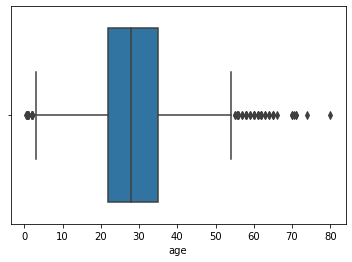

In [25]:
### Checking for Outliers "age".... 
## Box plot
sns.boxplot(tn.age)

C:\Users\imtiyaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

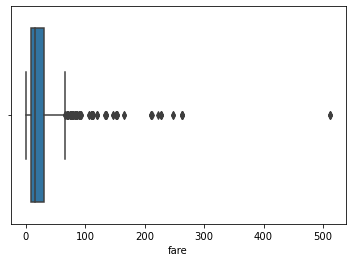

In [26]:
### Checking for Outliers "fare".... 
## Box plot
sns.boxplot(tn.fare)

In [27]:
### Outlier treatment .....
for i in tn[continous]:
    q1,q3 = tn[i].quantile([0.25,0.75])
    iqr = q3 - q1
    upper = q3 + 1.5* iqr
    lower = q1 - 1.5* iqr
    tn[i] = np.where(tn[i]>upper, upper,tn[i])
    tn[i] = np.where(tn[i]<lower,lower,tn[i])
    

C:\Users\imtiyaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

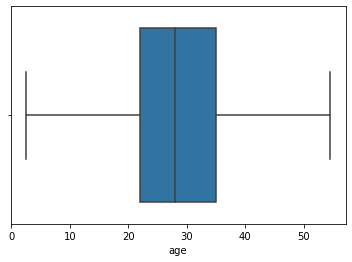

In [28]:
### Crosschecking for Outliers "age".... 
## Box plot
sns.boxplot(tn.age)

C:\Users\imtiyaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

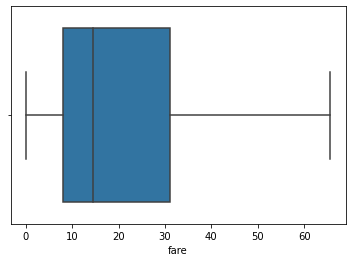

In [29]:
### Crosschecking for Outliers "fare".... 
## Box plot
sns.boxplot(tn.fare)

In [30]:
### Normalisation: 

In [31]:
from scipy.stats import zscore
tn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,65.6344,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [32]:
# Applying zscore to tn[continous]
tn[continous].apply(zscore)

,age,fare
0,-0.583432,-0.820552
1,0.742685,2.031623
2,-0.251903,-0.787578
3,0.494038,1.419297
4,0.494038,-0.781471
...,...,...
886,-0.169020,-0.539655
887,-0.832079,0.290823
888,-0.086138,-0.029155
889,-0.251903,0.290823


In [33]:
### Rounding up  we get means = 0 ,std = 1 i.e  (N~(0,1))
tn[continous].apply(zscore).describe().round()

,age,fare
count,891.0,891.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,0.0,0.0
max,2.0,2.0


In [34]:
#### Extracting the target variable....
target = tn['survived']
target.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [36]:
### Dropping the target variable from the dataset... 
tn.drop('survived',axis = 1 , inplace = True)
tn.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [37]:
### creating x(predictor), y(target) variables.. 
x = tn.values
y = target.values

In [38]:
### Importing train_test_split model from sklearn
from sklearn.model_selection import train_test_split

In [39]:
### Splitting the data into train and test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [40]:
### Importing logisticregression from sklearn
from sklearn.linear_model import LogisticRegression 

In [41]:
##  Creating an instance of LOGISTIC REGRESSION 
log = LogisticRegression()

In [42]:
### fitting the data into the model
log.fit(xtrain,ytrain)

C:\Users\imtiyaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#### prediction :
ypred = log.predict(xtest)

In [44]:
### Importing accuracy_score from Sklearn
from sklearn.metrics import accuracy_score

In [45]:
### model accuracy :
Model_accuracy = accuracy_score(ypred,ytest)
print(Model_accuracy)

0.7932960893854749


In [46]:
### Confution matrix:
from sklearn.metrics import confusion_matrix
conf_mat =confusion_matrix(ypred,ytest)
print(conf_mat)

[[90 21]
 [16 52]]


In [47]:
### Classification report:
from sklearn.metrics import classification_report
labels = ['Did not survive','Survived']
print(classification_report(ypred,ytest, target_names= labels))

                 precision    recall  f1-score   support

Did not survive       0.85      0.81      0.83       111
       Survived       0.71      0.76      0.74        68

       accuracy                           0.79       179
      macro avg       0.78      0.79      0.78       179
   weighted avg       0.80      0.79      0.79       179



In [ ]:
### The above logistic Regression model gives us 79%  prediction accuracy ...